In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

$$
cov[x,y]=\frac{1}{n}\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)
$$

$$
\rho = \frac{cov[x,y]}{\sigma_x \sigma_y}
$$

In [18]:
np.random.seed(145) # fijar una semilla para reproducir los resultados
x = np.random.normal(10,2,20)
y = 2*x + np.random.normal(10,3,20)

Text(0, 0.5, 'y')

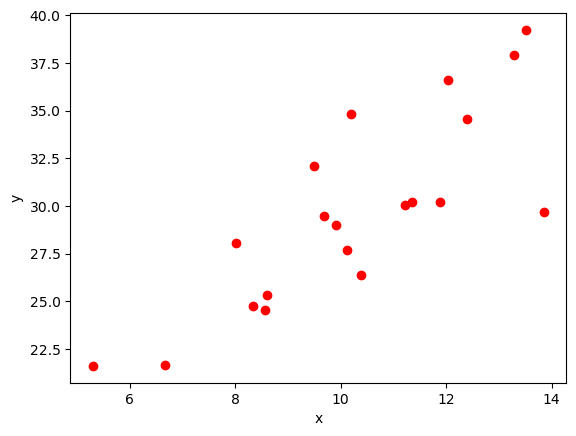

In [19]:
plt.scatter(x,y,c='red')
plt.xlabel('x')
plt.ylabel('y')

In [37]:
def cov(x,y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return np.sum((x-mean_x)*(y-mean_y)) * (1/(n-1))

cov(x,y)

5.170275778561246

In [31]:
np.cov(x,y)

array([[ 5.17027578,  9.30076589],
       [ 9.30076589, 25.30850725]])

In [32]:
np.var(x,ddof=1) # ddof = 1: para la muestra, ddof=0 para poblacion


5.170275778561246

In [29]:
np.var(y,ddof=1)

25.30850725235698

In [38]:
std_x = np.sqrt(cov(x,x))
std_y = np.sqrt(cov(y,y))
rho = cov(x,y) / (std_x * std_y)
rho

0.813071228491848

In [39]:
np.corrcoef(x,y,ddof=1) # para muestra ddof=1

/tmp/ipykernel_1151952/1296909308.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  np.corrcoef(x,y,ddof=1) # para muestra ddof=1


array([[1.        , 0.81307123],
       [0.81307123, 1.        ]])

In [40]:
iris = sb.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [41]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
 # matriz de correlaciones
cor_mat = iris.corr(numeric_only=True)
cor_mat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

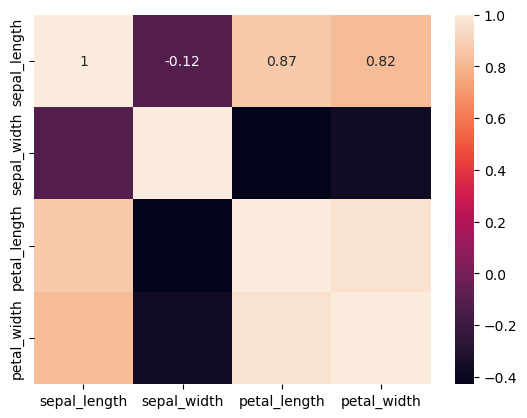

In [51]:
# mapa de calor
sb.heatmap(data=cor_mat,annot=True)